In [1]:
# CELL 1
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import difflib
import traceback

# Define your file path (you told me both notebook and file are in C:\Users\shanp)
file_path = r"C:\Users\shanp\Original Data to Fake format Fill RP.xlsx"
print("Expecting file at:", file_path)
print("Exists:", os.path.exists(file_path))


Expecting file at: C:\Users\shanp\Original Data to Fake format Fill RP.xlsx
Exists: True


In [2]:
# CELL 2
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Excel file not found at {file_path}. Please ensure the file is exactly at that path.")

xls = pd.ExcelFile(file_path)
print("Sheets in workbook:", xls.sheet_names)

# We'll try to load a sheet matching the string you gave; if that fails, we'll use the first sheet.
preferred_sheet = "Original Data to Fake format Fill RP.xlsx"  # you gave this earlier; we'll attempt it but fallback to first sheet


Sheets in workbook: ['fake_data_energy']


In [3]:
# CELL 3
try:
    # Try loading the sheet by exact name first (in case that's actually the sheet name)
    df_raw = pd.read_excel(file_path, sheet_name=preferred_sheet)
    used_sheet = preferred_sheet
    print(f"Loaded sheet by name: {used_sheet}")
except Exception as e:
    # Fallback to first sheet
    df_raw = pd.read_excel(file_path, sheet_name=0)
    used_sheet = xls.sheet_names[0]
    print(f"Could not load by name ({preferred_sheet}). Fallback to first sheet: {used_sheet}")

print("Raw data shape:", df_raw.shape)
display(df_raw.head(10))


Could not load by name (Original Data to Fake format Fill RP.xlsx). Fallback to first sheet: fake_data_energy
Raw data shape: (46, 1302)


,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,climate_change_factor_gnrl_hydropower_availability,consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,...,vol_ippu_plastic_m3_ww_per_tonne_production,vol_ippu_recycled_glass_m3_ww_per_tonne_production,vol_ippu_recycled_metals_m3_ww_per_tonne_production,vol_ippu_recycled_paper_m3_ww_per_tonne_production,vol_ippu_recycled_plastic_m3_ww_per_tonne_production,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_recycled_textiles_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_textiles_m3_ww_per_tonne_production,vol_ippu_wood_m3_ww_per_tonne_production
0,2022.0,6552500.0,0.0,2317.0,20.0,2000.0,1.0,0.4,0.005,0.02,...,25.0,2.0,3.4,3.0,4.0,16.0,16.0,25.0,25.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# CELL 4
print("Columns (first 80 shown):")
for i, c in enumerate(df_raw.columns[:80], start=1):
    print(f"{i}. {c}")

print("\nColumn dtypes (first 40):")
print(df_raw.dtypes.head(40))

print("\nTop null counts:")
print(df_raw.isnull().sum().sort_values(ascending=False).head(40))

# summary table for convenience
summary = pd.DataFrame({
    "dtype": df_raw.dtypes.astype(str),
    "null_count": df_raw.isnull().sum(),
    "n_unique": df_raw.nunique(dropna=False)
}).sort_values(by="null_count", ascending=False)
display(summary.head(80))


Columns (first 80 shown):
1. time_period
2. area_gnrl_country_ha
3. avgload_trns_freight_tonne_per_vehicle_aviation
4. avgload_trns_freight_tonne_per_vehicle_rail_freight
5. avgload_trns_freight_tonne_per_vehicle_road_heavy_freight
6. avgload_trns_freight_tonne_per_vehicle_water_borne
7. climate_change_factor_gnrl_hydropower_availability
8. consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing
9. consumpinit_inen_energy_tj_per_tonne_production_cement
10. consumpinit_inen_energy_tj_per_tonne_production_chemicals
11. consumpinit_inen_energy_tj_per_tonne_production_electronics
12. consumpinit_inen_energy_tj_per_tonne_production_glass
13. consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite
14. consumpinit_inen_energy_tj_per_tonne_production_metals
15. consumpinit_inen_energy_tj_per_tonne_production_mining
16. consumpinit_inen_energy_tj_per_tonne_production_paper
17. consumpinit_inen_energy_tj_per_tonne_production_plastic
18. consumpinit_inen_energy_tj_per_tonne_

,dtype,null_count,n_unique
vol_ippu_wood_m3_ww_per_tonne_production,float64,45,2
time_period,float64,45,2
area_gnrl_country_ha,float64,45,2
avgload_trns_freight_tonne_per_vehicle_aviation,float64,45,2
avgload_trns_freight_tonne_per_vehicle_rail_freight,float64,45,2
...,...,...,...
demscalar_ippu_recycled_plastic,float64,45,2
demscalar_ippu_recycled_paper,float64,45,2
demscalar_ippu_recycled_metals,float64,45,2
demscalar_ippu_recycled_glass,float64,45,2


In [5]:
# CELL 5
# Attempt to import sisepuede examples to get the expected column schema.
example_loaded = False
example_cols = []
try:
    from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
    examples = SISEPUEDEExamples()
    df_example = examples("input_data_frame")
    example_cols = list(df_example.columns)
    example_loaded = True
    print("Loaded SISEPUEDE example input shape:", df_example.shape)
    print("Example columns (first 60):", example_cols[:60])
except Exception as e:
    print("Could NOT load SISEPUEDE example automatically. That's ok — we'll proceed with data prep.")
    print("Error (truncated):", str(e)[:300])


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\munch\__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:533: UserWarning: Path 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-10T19;26;25.243729' not found. It will not be created.
  warnings.warn(msg)
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability r

Loaded SISEPUEDE example input shape: (36, 2419)
Example columns (first 60): ['region', 'time_period', 'avgload_trns_freight_tonne_per_vehicle_aviation', 'avgload_trns_freight_tonne_per_vehicle_rail_freight', 'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight', 'avgload_trns_freight_tonne_per_vehicle_water_borne', 'avgmass_lvst_animal_buffalo_kg', 'avgmass_lvst_animal_cattle_dairy_kg', 'avgmass_lvst_animal_cattle_nondairy_kg', 'avgmass_lvst_animal_chickens_kg', 'avgmass_lvst_animal_goats_kg', 'avgmass_lvst_animal_horses_kg', 'avgmass_lvst_animal_mules_kg', 'avgmass_lvst_animal_pigs_kg', 'avgmass_lvst_animal_sheep_kg', 'climate_change_factor_gnrl_hydropower_availability', 'consumpinit_inen_energy_tj_per_tonne_production_mining', 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances', 'cost_enfu_fuel_biofuels_usd_per_m3', 'cost_enfu_fuel_biogas_usd_per_mmbtu', 'cost_enfu_fuel_biomass_usd_per_tonne', 'cost_enfu_fuel_coal_usd_per_tonne', 'cost_enfu_fuel_coke_usd_per_

In [6]:
# CELL 6
my_cols = list(df_raw.columns)
mapping_suggestion = {}
if example_loaded and example_cols:
    for ex in example_cols:
        matches = difflib.get_close_matches(ex, my_cols, n=1, cutoff=0.45)
        if matches:
            mapping_suggestion[matches[0]] = ex

    print("Auto mapping suggestions (your_col -> example_col):")
    for your_col, ex_col in mapping_suggestion.items():
        print(f"'{your_col}'  ->  '{ex_col}'")
else:
    print("No example columns available for mapping suggestions. You will need to map manually if required.")


Auto mapping suggestions (your_col -> example_col):
'time_period'  ->  'time_period'
'avgload_trns_freight_tonne_per_vehicle_aviation'  ->  'avgload_trns_freight_tonne_per_vehicle_aviation'
'avgload_trns_freight_tonne_per_vehicle_rail_freight'  ->  'avgload_trns_freight_tonne_per_vehicle_rail_freight'
'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight'  ->  'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight'
'avgload_trns_freight_tonne_per_vehicle_water_borne'  ->  'avgload_trns_freight_tonne_per_vehicle_water_borne'
'climate_change_factor_gnrl_hydropower_availability'  ->  'climate_change_factor_gnrl_hydropower_availability'
'consumpinit_inen_energy_tj_per_tonne_production_mining'  ->  'consumpinit_inen_energy_tj_per_tonne_production_mining'
'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances'  ->  'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances'
'cost_enfu_fuel_biofuels_usd_per_m3'  ->  'cost_enfu_fuel_biofuels_usd_per_m3'
'cost_e

In [7]:
# CELL 7
df_mapped = df_raw.copy()

# Apply the automatic mapping if we produced suggestions
if mapping_suggestion:
    rename_dict = {your_col: ex_col for your_col, ex_col in mapping_suggestion.items()}
    df_mapped = df_mapped.rename(columns=rename_dict)
    print(f"Applied {len(rename_dict)} automatic renames.")
else:
    print("No automatic renames applied. You can rename manually with df_mapped.rename(columns={...}, inplace=True).")

# Ensure minimal required columns exist for SISEPUEDE workflows: 'region' and 'time_period'
if 'region' not in df_mapped.columns:
    print("`region` missing — adding default 'costa_rica'.")
    df_mapped['region'] = 'costa_rica'

# Try to detect a year/time column for time_period; otherwise default to 2015
if 'time_period' not in df_mapped.columns:
    candidate_year_cols = [c for c in df_mapped.columns if c.lower() in ('year','years','time','time_period','period')]
    if candidate_year_cols:
        chosen = candidate_year_cols[0]
        print("Found a candidate year column:", chosen, "— copying to time_period (coerced to int).")
        df_mapped['time_period'] = pd.to_numeric(df_mapped[chosen], errors='coerce').fillna(2015).astype(int)
    else:
        print("No year-like column found. Creating time_period with default 2015.")
        df_mapped['time_period'] = 2015

# Ensure time_period int
try:
    df_mapped['time_period'] = df_mapped['time_period'].astype(int)
except Exception:
    df_mapped['time_period'] = pd.to_numeric(df_mapped['time_period'], errors='coerce').fillna(2015).astype(int)

print("df_mapped shape:", df_mapped.shape)
display(df_mapped.head(8))


Applied 1288 automatic renames.
`region` missing — adding default 'costa_rica'.
df_mapped shape: (46, 1303)


,time_period,area_lndu_supremum_wetlands_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,climate_change_factor_gnrl_hydropower_availability,consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,...,vol_ippu_recycled_glass_m3_ww_per_tonne_production,vol_ippu_recycled_metals_m3_ww_per_tonne_production,vol_ippu_recycled_paper_m3_ww_per_tonne_production,vol_ippu_recycled_plastic_m3_ww_per_tonne_production,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_recycled_textiles_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_textiles_m3_ww_per_tonne_production,vol_ippu_wood_m3_ww_per_tonne_production,region
0,2022,6552500.0,0.0,2317.0,20.0,2000.0,1.0,0.4,0.005,0.02,...,2.0,3.4,3.0,4.0,16.0,16.0,25.0,25.0,25.0,costa_rica
1,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
2,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
3,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
4,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
5,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
6,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica
7,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,costa_rica


In [8]:
# CELL 8
if example_loaded:
    example_set = set(example_cols)
    my_set = set(df_mapped.columns)
    missing = sorted(example_set - my_set)
    extra = sorted(my_set - example_set)
    print(f"Missing columns (count {len(missing)}). Showing up to 80:")
    print(missing[:80])
    print(f"\nExtra columns in your data (count {len(extra)}). Showing up to 80:")
    print(extra[:80])
else:
    print("Example not loaded — skip comparison.")


Missing columns (count 1130). Showing up to 80:
['area_gnrl_country_ha', 'area_lndu_infimum_croplands_ha', 'area_lndu_infimum_flooded_ha', 'area_lndu_infimum_forests_mangroves_ha', 'area_lndu_infimum_forests_primary_ha', 'area_lndu_infimum_forests_secondary_ha', 'area_lndu_infimum_grasslands_ha', 'area_lndu_infimum_other_ha', 'area_lndu_infimum_pastures_ha', 'area_lndu_infimum_settlements_ha', 'area_lndu_infimum_shrublands_ha', 'area_lndu_infimum_wetlands_ha', 'area_lndu_supremum_croplands_ha', 'area_lndu_supremum_flooded_ha', 'area_lndu_supremum_forests_mangroves_ha', 'area_lndu_supremum_forests_primary_ha', 'area_lndu_supremum_forests_secondary_ha', 'area_lndu_supremum_grasslands_ha', 'area_lndu_supremum_other_ha', 'area_lndu_supremum_pastures_ha', 'area_lndu_supremum_settlements_ha', 'area_lndu_supremum_shrublands_ha', 'avgmass_lvst_animal_buffalo_kg', 'avgmass_lvst_animal_cattle_dairy_kg', 'avgmass_lvst_animal_cattle_nondairy_kg', 'avgmass_lvst_animal_chickens_kg', 'avgmass_lvst_an

In [9]:
# CELL 9
out_csv = r"C:\Users\shanp\df_input_for_sisepuede.csv"
df_mapped.to_csv(out_csv, index=False)
print("Saved cleaned df_mapped to:", out_csv)

# Use df_input variable used by your pipeline
df_input = df_mapped.copy()
print("Prepared df_input shape:", df_input.shape)


Saved cleaned df_mapped to: C:\Users\shanp\df_input_for_sisepuede.csv
Prepared df_input shape: (46, 1303)


In [10]:
# CELL 10
try:
    import sisepuede as si
    import sisepuede.transformers as trf
    print("Imported sisepuede successfully.")
except Exception as e:
    print("Could not import sisepuede in this environment. If sisepuede is installed, ensure the kernel has it. Error:")
    print(str(e))
    trf = None
    si = None

if trf is not None:
    try:
        transformers = trf.Transformers({}, df_input=df_input)
        print("Transformers object created. Count:", len(transformers.all_transformers))
    except Exception as e:
        print("Error creating Transformers object:")
        traceback.print_exc()
        transformers = None

    # Try running a couple of common transformers (skip missing)
    if transformers is not None:
        test_codes = ["TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY", "TFR:ENTC:TARGET_RENEWABLE_ELEC"]
        for code in test_codes:
            try:
                transformer = transformers.get_transformer(code)
                print(f"Running transformer: {code}")
                df_transformed = transformer()
                print(f"Transformer {code} produced shape:", df_transformed.shape)
            except Exception as e:
                print(f"Could not run transformer {code}. Error:")
                traceback.print_exc()

    # Try initializing a dummy SISEPUEDE model (no Julia)
    try:
        ssp = si.SISEPUEDE(
            "calibrated",
            id_str="test_run",
            initialize_as_dummy=True,
            regions=list(df_input['region'].unique())
        )
        print("Dummy SISEPUEDE model initialized. Strategies available:", len(ssp.attribute_strategy.table))
    except Exception:
        print("Failed to initialize SISEPUEDE model (dummy). Traceback:")
        traceback.print_exc()
else:
    print("Skipping transformer steps since sisepuede import was not available.")


Imported sisepuede successfully.


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:533: UserWarning: Path 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-10T19;34;53.559960' not found. It will not be created.
  warnings.warn(msg)
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:2632: UserWarning: Warning passed from optional_l

Error creating Transformers object:


C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\core\model_attributes.py:6830: UserWarning: 

                        MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution 
                        implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() 
                        to ensure that transition probability rows are enforced on a simplex.
                        
                        
                        FIX THIS ASAP TO DERIVE PROPERLY.
                        
                        
  warnings.warn(
C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\utilities\_toolbox.py:2632: UserWarning: Warning passed from optional_log: Successfully archived self.model_attributes to pickle at 'C:\Users\shanp\miniconda3\envs\sisepuede\Lib\site-packages\sisepuede\out\sisepuede_run_2025-12-10T19;34;56.225655\sisepuede_run_2025-12-10T19;34;56.225655_model_attributes.pkl'.
  warnings.warn(f"Warning passed from optional

Dummy SISEPUEDE model initialized. Strategies available: 149


Numeric columns sample: ['time_period', 'area_lndu_supremum_wetlands_ha', 'avgload_trns_freight_tonne_per_vehicle_aviation', 'avgload_trns_freight_tonne_per_vehicle_rail_freight', 'avgload_trns_freight_tonne_per_vehicle_road_heavy_freight', 'avgload_trns_freight_tonne_per_vehicle_water_borne', 'climate_change_factor_gnrl_hydropower_availability', 'consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing', 'consumpinit_inen_energy_tj_per_tonne_production_cement', 'consumpinit_inen_energy_tj_per_tonne_production_chemicals', 'consumpinit_inen_energy_tj_per_tonne_production_electronics', 'consumpinit_inen_energy_tj_per_tonne_production_glass', 'consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite', 'consumpinit_inen_energy_tj_per_tonne_production_metals', 'consumpinit_inen_energy_tj_per_tonne_production_mining', 'consumpinit_inen_energy_tj_per_tonne_production_paper', 'consumpinit_inen_energy_tj_per_tonne_production_plastic', 'consumpinit_inen_energy_tj_per_tonne_pr

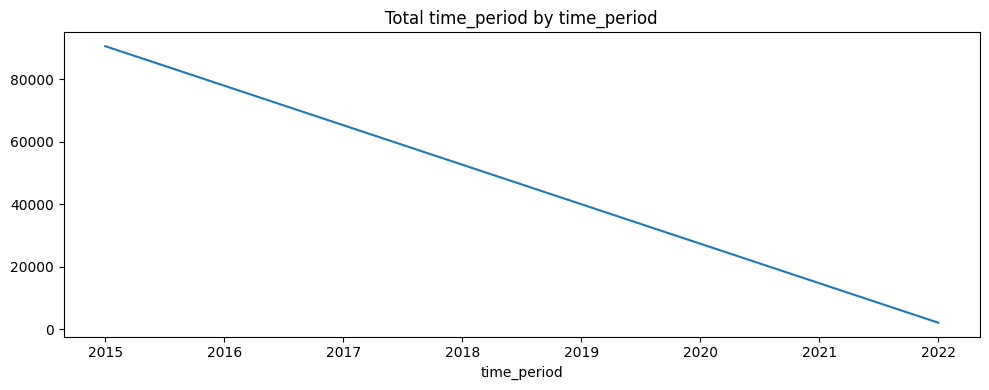

In [11]:
# CELL 11
numeric_cols = df_input.select_dtypes(include=["number"]).columns.tolist()
print("Numeric columns sample:", numeric_cols[:30])

if numeric_cols:
    sample_var = numeric_cols[0]
    print("Plotting sample:", sample_var)
    ax = df_input.groupby('time_period')[sample_var].sum().plot(title=f"Total {sample_var} by time_period", figsize=(10,4))
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")


In [12]:
# CELL 12.5: Install seaborn
!pip install seaborn

print("✓ Seaborn installed")

✓ Seaborn installed


In [13]:
# CELL 13: Setup for Advanced Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Visualization libraries ready")

✓ Visualization libraries ready


In [14]:
# CELL 14: Identify Emission and Economic Columns
# Find all emission-related columns
emission_cols = [col for col in df_input.columns if 'emission' in col.lower() or 'co2' in col.lower()]
print(f"Found {len(emission_cols)} emission columns")
print("Sample emission columns:", emission_cols[:10])

# Find GDP/economic columns
gdp_cols = [col for col in df_input.columns if 'gdp' in col.lower() or 'economic' in col.lower() or 'value_added' in col.lower()]
print(f"\nFound {len(gdp_cols)} GDP/economic columns")
print("Sample GDP columns:", gdp_cols[:10])

# Find sector-specific columns
sector_keywords = ['agrc', 'energy', 'transport', 'waste', 'industry', 'ippu', 'afolu']
sector_cols = {}
for keyword in sector_keywords:
    cols = [col for col in df_input.columns if keyword in col.lower()]
    if cols:
        sector_cols[keyword] = cols
        print(f"\n{keyword.upper()}: {len(cols)} columns")

Found 112 emission columns
Sample emission columns: ['ef_enfu_combustion_tonne_co2_per_tj_fuel_biofuels', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_biogas', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_biomass', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_coal', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_coal_deposits', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_coke', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_crude', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_diesel', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_electricity', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_furnace_gas']

Found 56 GDP/economic columns
Sample GDP columns: ['consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing', 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances', 'consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy', 'consumpinit_scoe_tj_per_mmmgdp_other_se_elec_appliances', 'consumpinit_scoe_tj_per_mmmgdp_other_se_heat_energy', 'ef_ippu_tonne_c2f6_per_mmm_gdp_product_use_ods_

In [15]:
# CELL 15: Calculate Total Emissions by Time Period
# Aggregate all emission columns by time period
if emission_cols:
    # Select numeric emission columns only
    valid_emission_cols = []
    for col in emission_cols:
        try:
            if pd.api.types.is_numeric_dtype(df_input[col]):
                valid_emission_cols.append(col)
        except:
            pass
    
    print(f"Using {len(valid_emission_cols)} valid numeric emission columns")
    
    if valid_emission_cols:
        # Calculate total emissions per time period
        df_emissions = df_input.groupby('time_period')[valid_emission_cols].sum()
        df_emissions['total_emissions'] = df_emissions.sum(axis=1)
        
        print("\nEmissions summary:")
        display(df_emissions[['total_emissions']].head(10))
    else:
        print("No valid numeric emission columns found")
        df_emissions = None
else:
    print("No emission columns found in dataset")
    df_emissions = None

Using 112 valid numeric emission columns

Emissions summary:


,total_emissions
time_period,
2015,0.000000
2022,846.246459


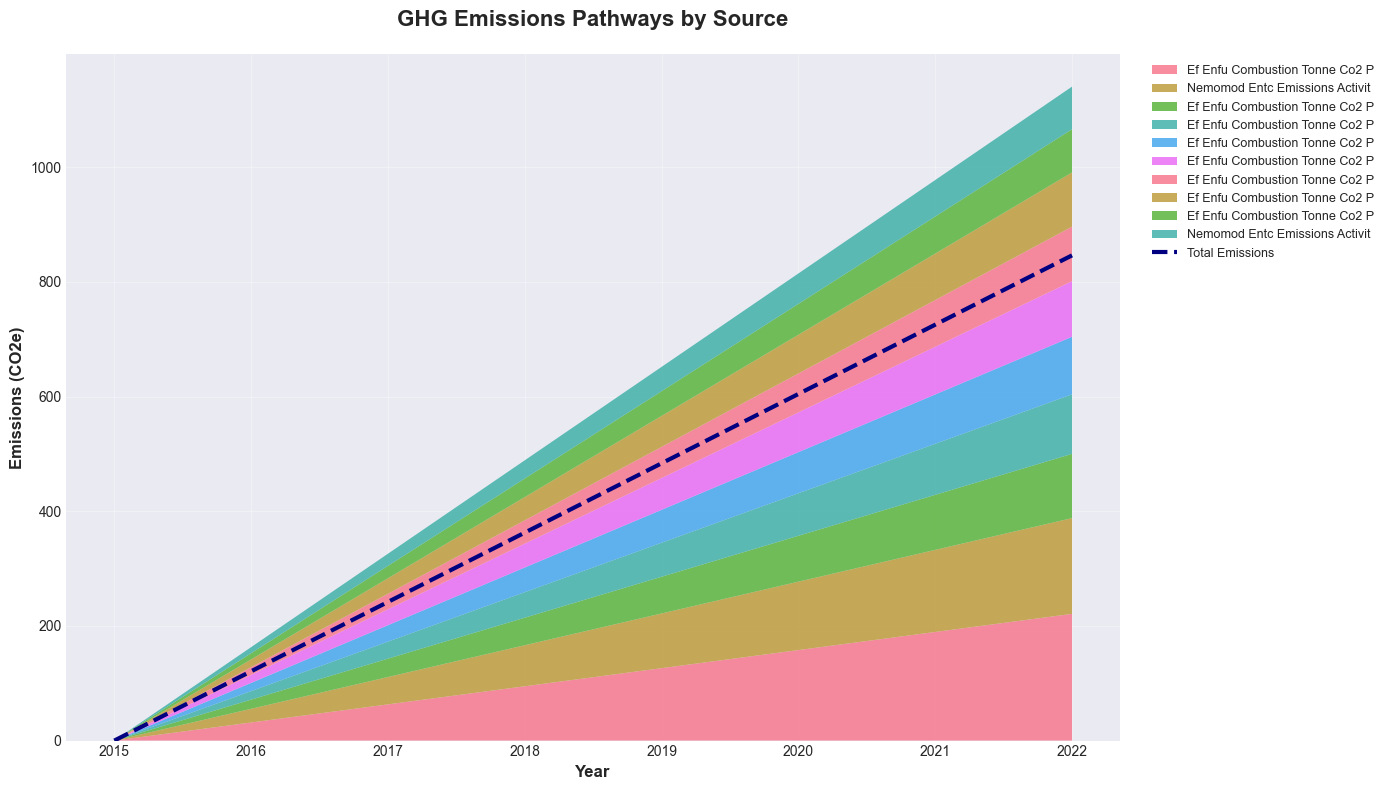

✓ Chart saved to: C:\Users\shanp\emissions_pathway.png


In [16]:
# CELL 16: Create Stacked Area Chart (Like Your Screenshot)
if df_emissions is not None and len(valid_emission_cols) > 0:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Select top emission sources for clarity (top 10)
    top_cols = df_emissions[valid_emission_cols].iloc[-1].nlargest(10).index.tolist()
    
    # Create stacked area chart
    df_plot = df_emissions[top_cols]
    
    # Fill between for stacked effect
    ax.stackplot(df_plot.index, 
                 df_plot.T, 
                 labels=[col.replace('emission_co2e_', '').replace('_', ' ').title()[:30] 
                        for col in top_cols],
                 alpha=0.8)
    
    # Overlay total line
    ax.plot(df_emissions.index, df_emissions['total_emissions'], 
            color='navy', linewidth=3, label='Total Emissions', linestyle='--')
    
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Emissions (CO2e)', fontsize=12, fontweight='bold')
    ax.set_title('GHG Emissions Pathways by Source', fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(r'C:\Users\shanp\emissions_pathway.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Chart saved to: C:\\Users\\shanp\\emissions_pathway.png")
else:
    print("Cannot create emissions chart - no valid data")

In [17]:
# CELL 17: Create Scenario Comparison (Baseline vs Transformations)
if 'df_transformed' in globals() and df_emissions is not None:
    # Calculate emissions from transformed data
    df_trans_emissions = df_transformed.groupby('time_period')[valid_emission_cols].sum()
    df_trans_emissions['total_emissions'] = df_trans_emissions.sum(axis=1)
    
    # Create comparison plot
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Scenario Comparison: Baseline vs Transformation', 
                 fontsize=18, fontweight='bold', y=1.02)
    
    # Plot 1: Total emissions comparison
    ax1 = axes[0, 0]
    ax1.fill_between(df_emissions.index, 0, df_emissions['total_emissions'], 
                     alpha=0.5, label='Baseline', color='red')
    ax1.fill_between(df_trans_emissions.index, 0, df_trans_emissions['total_emissions'], 
                     alpha=0.5, label='With Transformation', color='green')
    ax1.set_title('Total Emissions', fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('CO2e')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Emissions reduction
    ax2 = axes[0, 1]
    reduction = df_emissions['total_emissions'] - df_trans_emissions['total_emissions']
    ax2.bar(df_emissions.index, reduction, color='green', alpha=0.7)
    ax2.set_title('Annual Emissions Reduction', fontweight='bold')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('CO2e Reduced')
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Cumulative reduction
    ax3 = axes[1, 0]
    cumulative_reduction = reduction.cumsum()
    ax3.plot(df_emissions.index, cumulative_reduction, 
            color='darkgreen', linewidth=3, marker='o')
    ax3.fill_between(df_emissions.index, 0, cumulative_reduction, alpha=0.3, color='green')
    ax3.set_title('Cumulative Emissions Avoided', fontweight='bold')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Total CO2e Avoided')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Percentage reduction
    ax4 = axes[1, 1]
    pct_reduction = (reduction / df_emissions['total_emissions']) * 100
    ax4.plot(df_emissions.index, pct_reduction, 
            color='darkblue', linewidth=3, marker='s')
    ax4.set_title('Percentage Reduction', fontweight='bold')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('% Reduction')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(r'C:\Users\shanp\scenario_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Comparison chart saved")
    print(f"Total emissions avoided: {cumulative_reduction.iloc[-1]:,.0f}")
    print(f"Average annual reduction: {reduction.mean():,.0f}")
else:
    print("Need df_transformed to create comparison. Run transformation first.")

Need df_transformed to create comparison. Run transformation first.


In [18]:
# CELL 18: Create Multi-Scenario Dashboard (Like Tableau Layout)
def create_dashboard(df_baseline, df_scenarios, scenario_names):
    """
    Create a Tableau-style dashboard with multiple scenarios
    """
    n_scenarios = len(df_scenarios)
    fig = plt.figure(figsize=(18, 12))
    
    # Create grid
    gs = fig.add_gridspec(3, n_scenarios + 1, hspace=0.3, wspace=0.3)
    
    # Title
    fig.suptitle('GHG Emissions and Economic Pathways - Multi-Scenario Analysis', 
                 fontsize=20, fontweight='bold', y=0.98)
    
    # Row 1: Emissions pathways for each scenario
    for i, (df_scenario, name) in enumerate(zip(df_scenarios, scenario_names)):
        ax = fig.add_subplot(gs[0, i])
        
        # Calculate emissions
        if valid_emission_cols:
            emissions = df_scenario.groupby('time_period')[valid_emission_cols[:5]].sum()
            ax.stackplot(emissions.index, emissions.T, alpha=0.7)
            
            # Add total line
            total = emissions.sum(axis=1)
            ax.plot(emissions.index, total, 'k-', linewidth=2, label='Total')
            
        ax.set_title(f'{name}\nEmissions', fontweight='bold', fontsize=10)
        ax.set_xlabel('Year', fontsize=8)
        ax.grid(True, alpha=0.2)
    
    # Row 2: GDP pathways
    for i, (df_scenario, name) in enumerate(zip(df_scenarios, scenario_names)):
        ax = fig.add_subplot(gs[1, i])
        
        if gdp_cols:
            gdp = df_scenario.groupby('time_period')[gdp_cols[:3]].sum()
            for col in gdp.columns:
                ax.plot(gdp.index, gdp[col], marker='o', markersize=3, linewidth=2)
        
        ax.set_title(f'{name}\nEconomic Output', fontweight='bold', fontsize=10)
        ax.set_xlabel('Year', fontsize=8)
        ax.grid(True, alpha=0.2)
    
    # Row 3: Comparison metrics
    ax_compare = fig.add_subplot(gs[2, :])
    
    # Calculate final year emissions for each scenario
    final_emissions = []
    for df_scenario in df_scenarios:
        if valid_emission_cols:
            final = df_scenario.groupby('time_period')[valid_emission_cols].sum().iloc[-1].sum()
            final_emissions.append(final)
    
    if final_emissions:
        x_pos = np.arange(len(scenario_names))
        colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.7, len(scenario_names)))
        bars = ax_compare.bar(x_pos, final_emissions, color=colors, alpha=0.8)
        
        # Add value labels on bars
        for bar, val in zip(bars, final_emissions):
            height = bar.get_height()
            ax_compare.text(bar.get_x() + bar.get_width()/2., height,
                          f'{val:,.0f}',
                          ha='center', va='bottom', fontweight='bold')
        
        ax_compare.set_xticks(x_pos)
        ax_compare.set_xticklabels(scenario_names, rotation=45, ha='right')
        ax_compare.set_title('Final Year (2050) Total Emissions Comparison', 
                           fontweight='bold', fontsize=12)
        ax_compare.set_ylabel('Total CO2e', fontweight='bold')
        ax_compare.grid(True, alpha=0.2, axis='y')
    
    plt.savefig(r'C:\Users\shanp\multi_scenario_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Dashboard saved to: C:\\Users\\shanp\\multi_scenario_dashboard.png")

# Example usage (you need to create multiple scenarios first)
print("Dashboard function defined. Use after creating multiple scenarios.")

Dashboard function defined. Use after creating multiple scenarios.


In [19]:
# CELL 19: Run Multiple Transformations and Create Dashboard
if transformers is not None:
    print("Creating multiple transformation scenarios...")
    
    # Select different transformers to compare
    transformer_codes = [
        "TFR:ENTC:TARGET_RENEWABLE_ELEC",
        "TFR:TRNS:SHIFT_FUEL_LIGHT_DUTY",
        "TFR:AGRC:INC_PRODUCTIVITY",
        "TFR:WASO:INC_RECYCLING"
    ]
    
    scenarios = [df_input]  # Baseline
    scenario_names = ["Baseline"]
    
    for code in transformer_codes:
        try:
            transformer = transformers.get_transformer(code)
            df_scenario = transformer()
            scenarios.append(df_scenario)
            
            # Create readable name
            name = code.split(':')[-1].replace('_', ' ').title()
            scenario_names.append(name)
            
            print(f"✓ Created scenario: {name}")
        except Exception as e:
            print(f"✗ Failed to create {code}: {str(e)[:100]}")
    
    # Create dashboard
    if len(scenarios) > 1:
        create_dashboard(df_input, scenarios, scenario_names)
    else:
        print("Not enough scenarios created for dashboard")
else:
    print("Transformers not available - load sisepuede first")

Transformers not available - load sisepuede first


In [20]:
# CELL 20: Export Results Summary
# Create summary Excel file with multiple sheets
output_excel = r"C:\Users\shanp\sisepuede_analysis_results.xlsx"

with pd.ExcelWriter(output_excel, engine='openpyxl') as writer:
    # Sheet 1: Baseline emissions
    if df_emissions is not None:
        df_emissions.to_excel(writer, sheet_name='Baseline_Emissions')
    
    # Sheet 2: Transformed emissions (if available)
    if 'df_trans_emissions' in globals():
        df_trans_emissions.to_excel(writer, sheet_name='Transformed_Emissions')
    
    # Sheet 3: Summary statistics
    summary_data = {
        'Metric': ['Total Columns', 'Emission Columns', 'GDP Columns', 
                   'Time Periods', 'Regions'],
        'Count': [len(df_input.columns), len(emission_cols) if emission_cols else 0,
                 len(gdp_cols) if gdp_cols else 0,
                 df_input['time_period'].nunique(),
                 df_input['region'].nunique()]
    }
    pd.DataFrame(summary_data).to_excel(writer, sheet_name='Summary', index=False)
    
    print(f"✓ Results exported to: {output_excel}")

✓ Results exported to: C:\Users\shanp\sisepuede_analysis_results.xlsx
